# **Autonomous Vehicle Pedestrian Tracking as a Constraint Satisfaction Problem (CSP)**

---

## **Objective:**

Track the movement of a pedestrian on a 1D road using sensor data, framed as a **Constraint Satisfaction Problem (CSP)**. The goal is to estimate the pedestrian’s most accurate trajectory over time, despite noisy sensor readings, and ensure the autonomous vehicle maintains a safe distance from the pedestrian.

---

## **1. Problem Setup**

### **Variables (States in CSP):**  
- The pedestrian's position at each time step on a 1D grid is represented as a variable:  
  \[
  X`1`, X`2`, ..., X`n`
  \]
  where \( X`i` \) represents the pedestrian's position at time step \( *i* ).

### **Domains:**  
- The domain for each variable \( X`i` \) is the range of possible positions the pedestrian can take on the 1D road at time step \( *i* \). This domain is constrained by the pedestrian’s possible speed and motion.
- Example domain for each time step:  
  
  X`i`
 ∈ \{0, 1, 2, ..., road length}
  bold text

---

## **2. Constraints**

### **Motion Constraint:**  
- The pedestrian’s position at time step \( *i*+1 \) should be close to the position at time step \( i \). The pedestrian cannot move faster than a certain speed:  

  |X`i+1` - X`i`| <= V`max`
  
  where V`max` is the maximum speed of the pedestrian.

### **Sensor Data Constraint:**  
- The position estimated from sensor data may be noisy. Thus, the actual position at time step \( i \) should be within a small margin \( \epsilon \) of the sensor-reported position:  
  
  ∣ Xi − **sensor_data**`i`∣≤ϵ
  where     ( ϵ) is the noise tolerance.

### **Safe Distance Constraint:**  
- The autonomous vehicle must maintain a safe distance \( d_{\text{safe}} \) from the pedestrian at all times:  
  \[
  |X`i` - V`i`| ≥ d`safe` \]
  where \( V`i` \) is the vehicle’s position at time step \( i \), and \( d`safe` \) is the minimum safe distance.

---

## **3. CSP Search Strategy**

### **Constraint Propagation:**  
- The system uses constraint propagation techniques to reduce the domain of possible pedestrian positions at each time step by considering prior time steps, sensor data, and movement constraints.

### **Backtracking Search:**  
- If constraint propagation alone doesn’t yield a solution, the system uses **backtracking** to explore potential pedestrian positions at each time step until it finds a valid trajectory that satisfies all constraints.

---

## **4. Goal**

- **Primary Goal:** Find the pedestrian’s exact trajectory (i.e., their position over time) that satisfies all constraints.

- **Secondary Goal:** Ensure the autonomous vehicle maintains a safe distance from the pedestrian based on the estimated trajectory.

---

## **5. Walkthrough Example**

### **Initial State:**  
- The pedestrian starts at position \( X`0` = 0 \) on a 1D road.
- The system observes noisy sensor data at time step 1: sensor reports \( X`1` = 0 \).

### **Time Step 1 (Prediction and Correction):**

**Prediction:**  
- The system predicts that the pedestrian will be at position \( X`1` = 1 \) at the next time step, assuming they move at a constant speed.

**Correction:**  
- The sensor data reports that the pedestrian is at \( X`1` = 2 \). The system adjusts the prediction, correcting the trajectory toward position 2.

### **Time Step 2:**

**Prediction:**  
- The system predicts the pedestrian will now move to position \( X`2` = 3 \) based on the corrected data.

**Correction:**  
- The sensor again reports position \( X`2` = 2 \), indicating the pedestrian may have stopped. The system corrects the prediction to reflect this.

---

## **6. Challenges**

### **Sensor Noise:**  
- The sensor data is noisy, meaning the system must handle uncertainty and potential errors in predictions. The CSP approach helps balance sensor noise with predictions.

### **Pedestrian Movement:**  
- The pedestrian may stop, accelerate, or move unpredictably, complicating the tracking process.

### **Environmental Obstacles:**  
- Additional obstacles or distractions on the road can impact the accuracy of the sensor readings, further complicating the estimation of the pedestrian's trajectory.

---

## **7. Object Tracking Algorithm (Kalman Filter)**

The **Kalman Filter** helps estimate the pedestrian’s trajectory while accounting for noisy sensor data. It combines two key steps:

### **Prediction Step:**  
- Predict where the pedestrian is likely to move next based on their past movement and current speed.

### **Correction Step:**  
- Use new sensor observations to correct the prediction, adjusting for noise in the data to provide a more accurate estimate of the pedestrian’s position.

---

**TASKS**

* **Task# 01: Map Coloring**






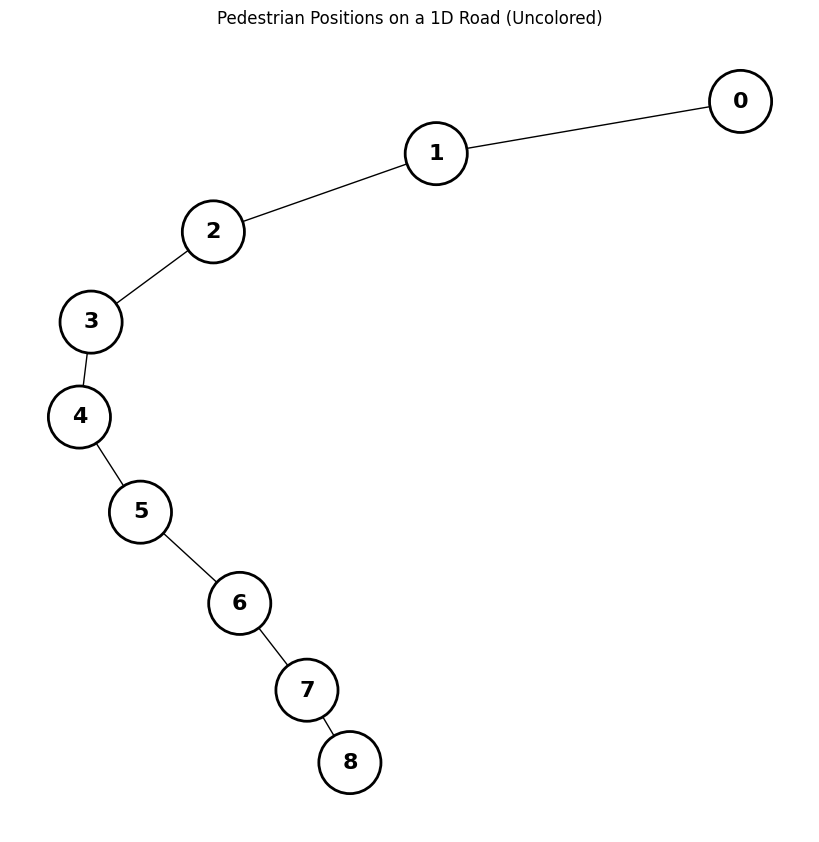

In [2]:
# Install necessary libraries (if needed)
# !pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define the graph with 9 vertices (representing pedestrian positions over time)
# and edges representing the movement from one position to the next
G = nx.Graph()

# In this case, the edges represent the possible transitions between positions over time
edges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8)]  # Pedestrian path
G.add_edges_from(edges)

# Step 2: Visualize the pedestrian positions (uncolored state)
def visualize_uncolored_graph():
    plt.figure(figsize=(8, 8))  # Increase the figure size for better clarity
    pos = nx.spring_layout(G, seed=42)  # Use spring layout for better node spacing
    # Nodes are all colored white (uncolored)
    node_colors = ['#ffffff'] * len(G.nodes)  # White color for uncolored positions
    edge_colors = 'black'  # Black edges for movement paths
    node_border_color = 'black'  # Black border for node circles

    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold',
            node_size=2000, font_size=16, font_color='black', edge_color=edge_colors,
            linewidths=2, node_shape='o',  # 'o' for circular nodes (positions)
            edgecolors=node_border_color)  # Set the border color of the nodes

    plt.title("Pedestrian Positions on a 1D Road (Uncolored)")
    plt.show()

# Step 3: Display the pedestrian position graph
visualize_uncolored_graph()


Step 1: Pedestrian at Node 0 assigned Position 0


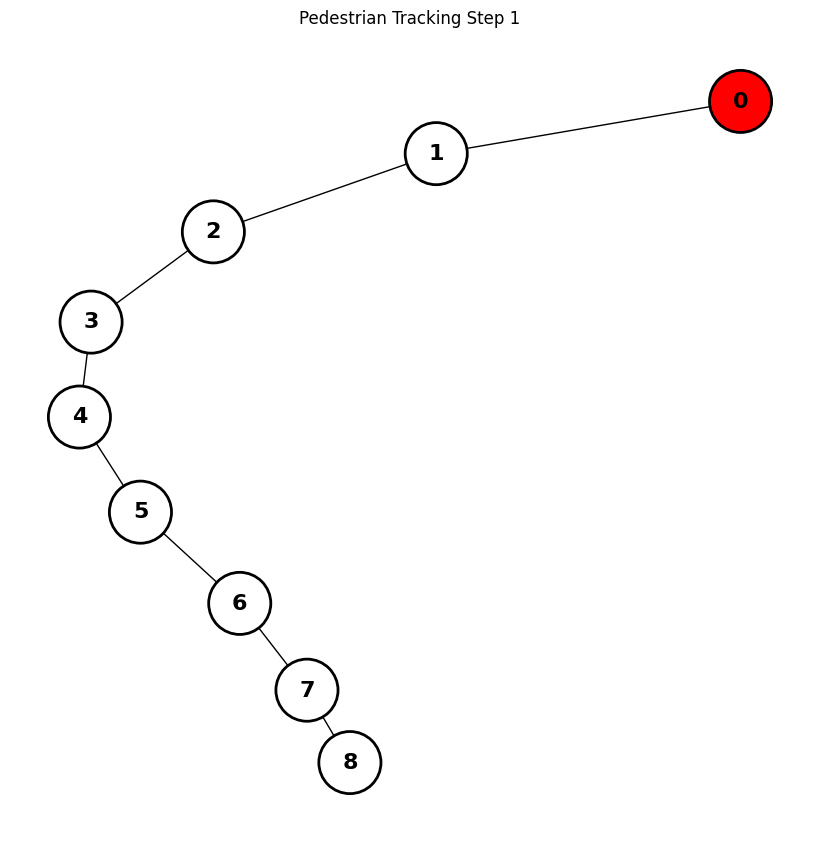

Step 2: Pedestrian at Node 1 assigned Position 1


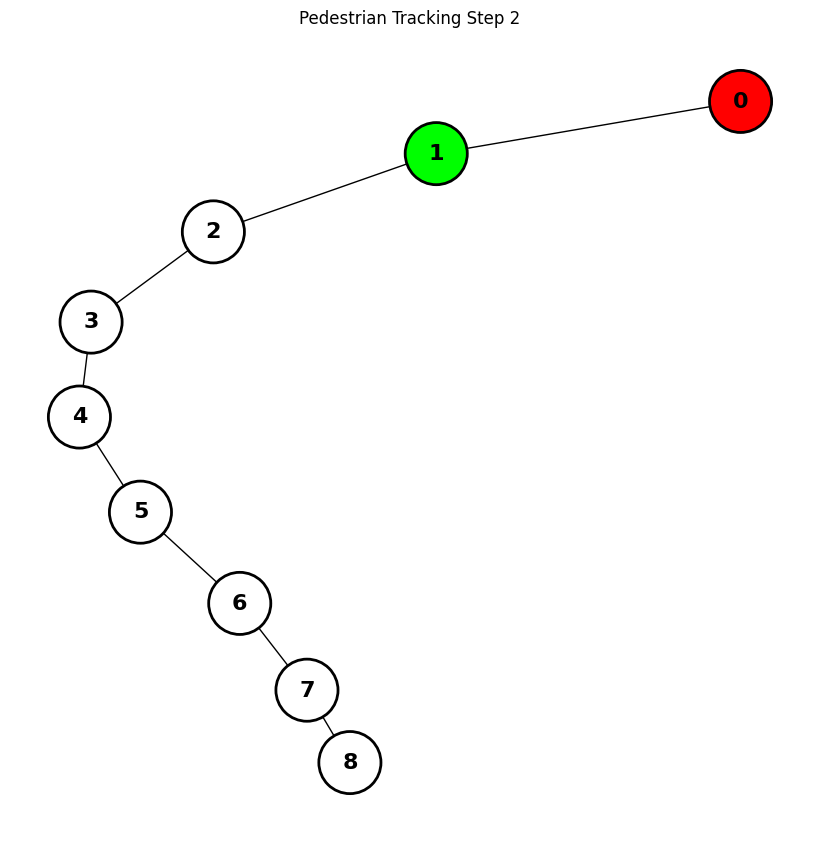

Step 3: Pedestrian at Node 2 assigned Position 0


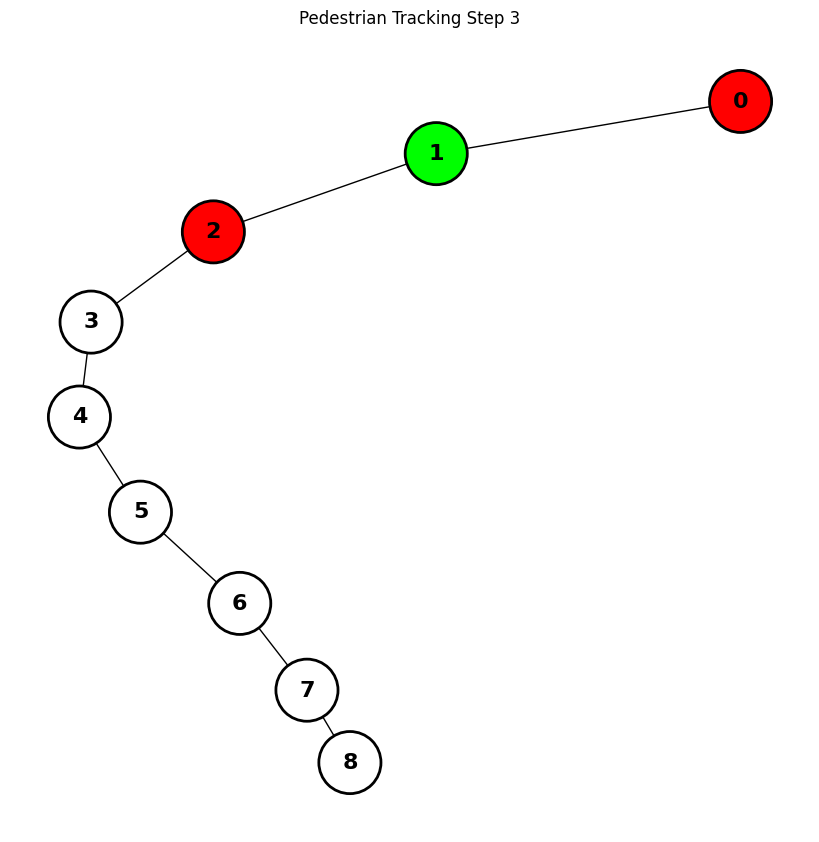

Step 4: Pedestrian at Node 3 assigned Position 1


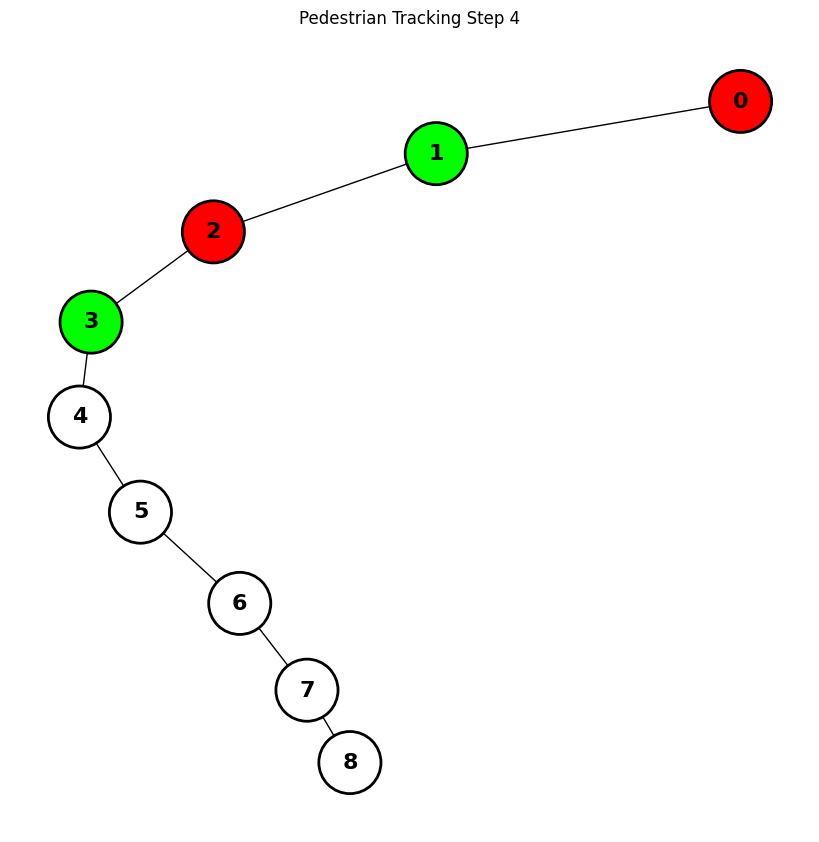

Step 5: Pedestrian at Node 4 assigned Position 0


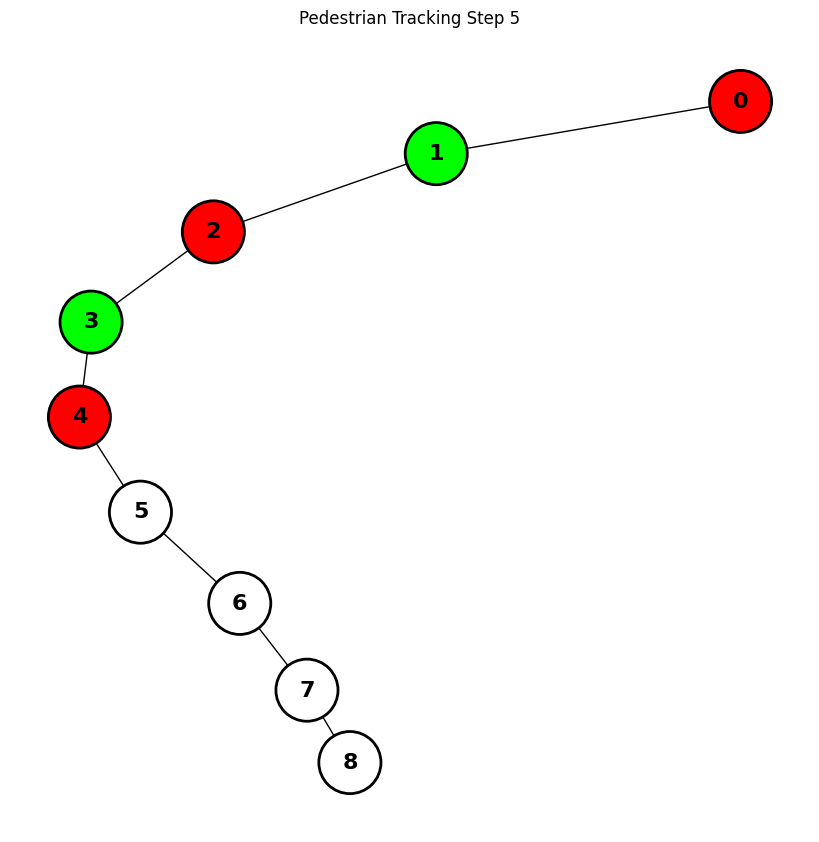

Step 6: Pedestrian at Node 5 assigned Position 1


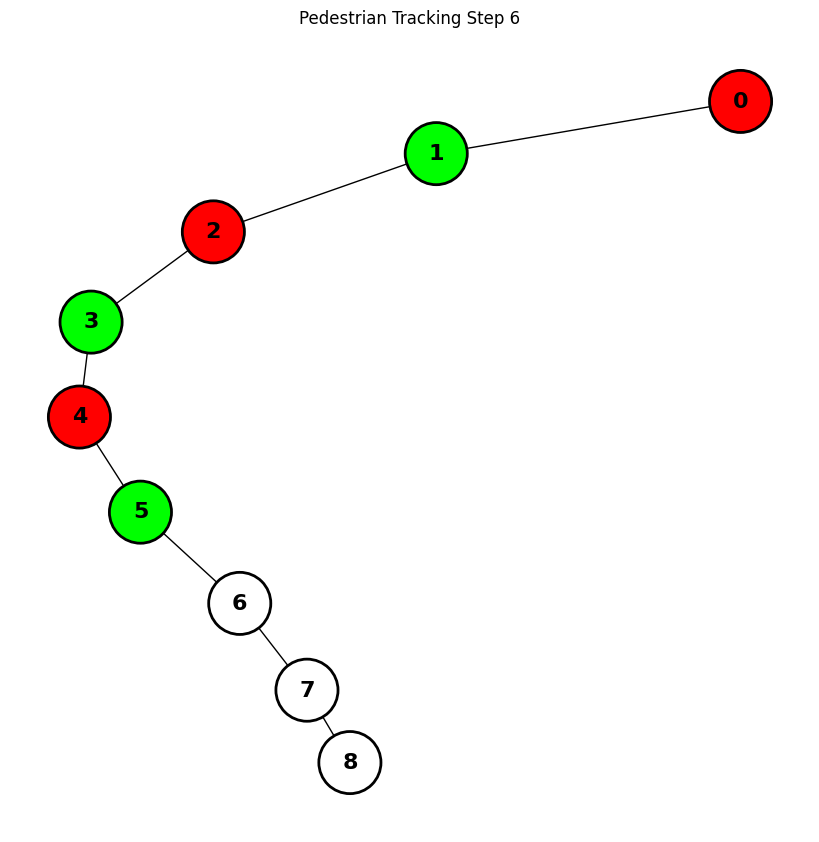

Step 7: Pedestrian at Node 6 assigned Position 0


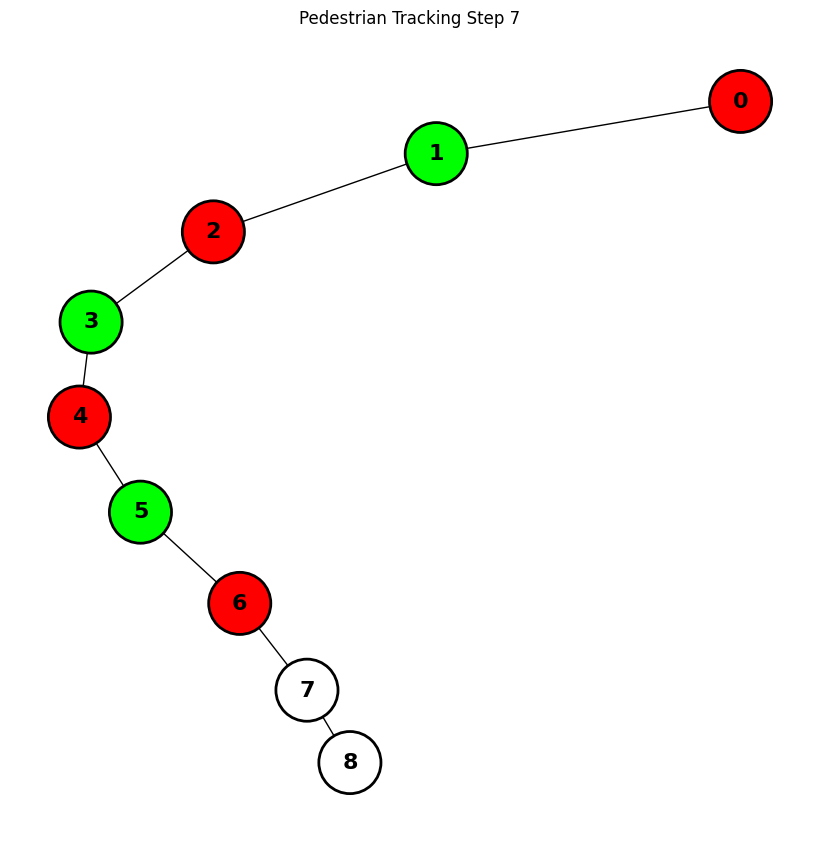

Step 8: Pedestrian at Node 7 assigned Position 1


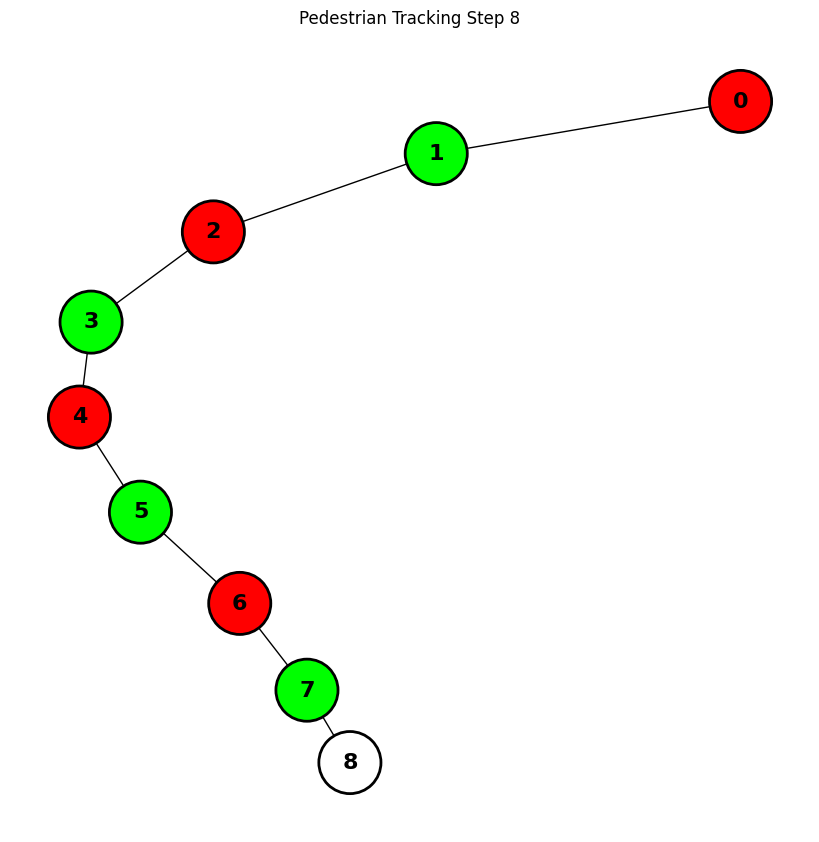

Step 9: Pedestrian at Node 8 assigned Position 0


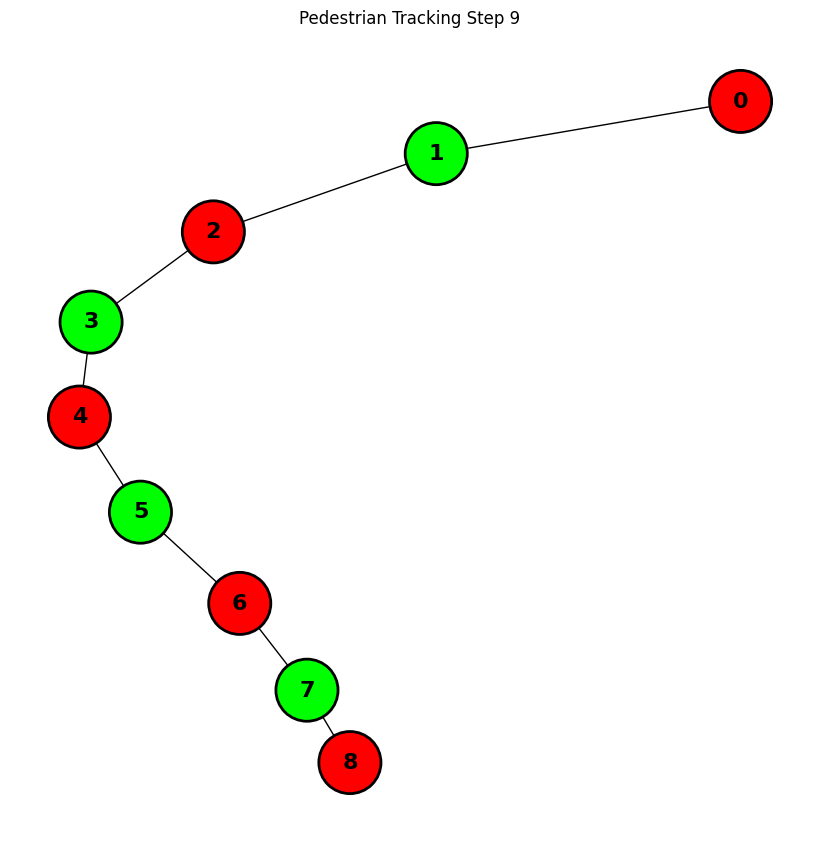

Final Pedestrian Position Assignment: {0: 'Position 0', 1: 'Position 1', 2: 'Position 0', 3: 'Position 1', 4: 'Position 0', 5: 'Position 1', 6: 'Position 0', 7: 'Position 1', 8: 'Position 0'}


In [3]:
# !pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define the graph for pedestrian positions (nodes) and movement (edges)
G = nx.Graph()
# Defining the pedestrian path as transitions between positions
edges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8)]
G.add_edges_from(edges)

# Step 2: Define the available pedestrian states (positions)
states = ['Position 0', 'Position 1', 'Position 2', 'Position 3', 'Position 4',
          'Position 5', 'Position 6', 'Position 7', 'Position 8']

# Step 3: Function to visualize the pedestrian tracking step by step
def visualize_graph(assignment, step):
    plt.figure(figsize=(8, 8))  # Increase the figure size for better clarity
    pos = nx.spring_layout(G, seed=42)  # Use spring layout for better node spacing

    # Default color for uncolored nodes is white
    node_colors = ['#ffffff'] * len(G.nodes)
    # Assign colors to the nodes based on the current assignment (simulating positions)
    for node, state in assignment.items():
        if state == 'Position 0':
            node_colors[node] = '#FF0000'  # Red for Position 0
        elif state == 'Position 1':
            node_colors[node] = '#00FF00'  # Green for Position 1
        elif state == 'Position 2':
            node_colors[node] = '#0000FF'  # Blue for Position 2
        elif state == 'Position 3':
            node_colors[node] = '#FFFF00'  # Yellow for Position 3
        elif state == 'Position 4':
            node_colors[node] = '#FF00FF'  # Magenta for Position 4
        elif state == 'Position 5':
            node_colors[node] = '#00FFFF'  # Cyan for Position 5
        elif state == 'Position 6':
            node_colors[node] = '#FFA500'  # Orange for Position 6
        elif state == 'Position 7':
            node_colors[node] = '#800080'  # Purple for Position 7
        elif state == 'Position 8':
            node_colors[node] = '#808080'  # Gray for Position 8

    # Draw the graph with current pedestrian positions
    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold',
            node_size=2000, font_size=16, font_color='black', edge_color='black',
            linewidths=2, node_shape='o', edgecolors='black')

    plt.title(f"Pedestrian Tracking Step {step}")
    plt.show()

# Step 4: Function to check if a pedestrian's position assignment is valid
def is_valid_position(node, position, assignment):
    # Check all neighboring nodes (previous or next time step) to ensure no conflict
    for neighbor in G.neighbors(node):
        if neighbor in assignment and assignment[neighbor] == position:
            return False  # Conflict found (same position assigned in consecutive steps)
    return True  # No conflict

# Step 5: Function to track the pedestrian positions with conflict checking (sequential assignment)
def track_pedestrian_with_conflict_checking():
    assignment = {}  # Dictionary to store node-position assignment
    node_list = list(G.nodes)  # Get the list of nodes (time steps)

    # Step through each node and assign positions while checking for conflicts
    for i, node in enumerate(node_list):
        for state in states:
            if is_valid_position(node, state, assignment):
                assignment[node] = state  # Assign the position
                print(f"=======================================")
                print(f"Step {i+1}: Pedestrian at Node {node} assigned {state}")
                print(f"=======================================")
                visualize_graph(assignment, i+1)  # Visualize the pedestrian tracking at each step
                break  # Move to the next node once a valid position is found

    return assignment

# Step 6: Track the pedestrian and display the process step by step
final_assignment = track_pedestrian_with_conflict_checking()

print("Final Pedestrian Position Assignment:", final_assignment)


**Graph Coloring with Backtracking and Heuristics**

Choose a heuristic:
1. Minimum Remaining Values (MRV)
2. Degree Heuristic
Enter 1 or 2: 2


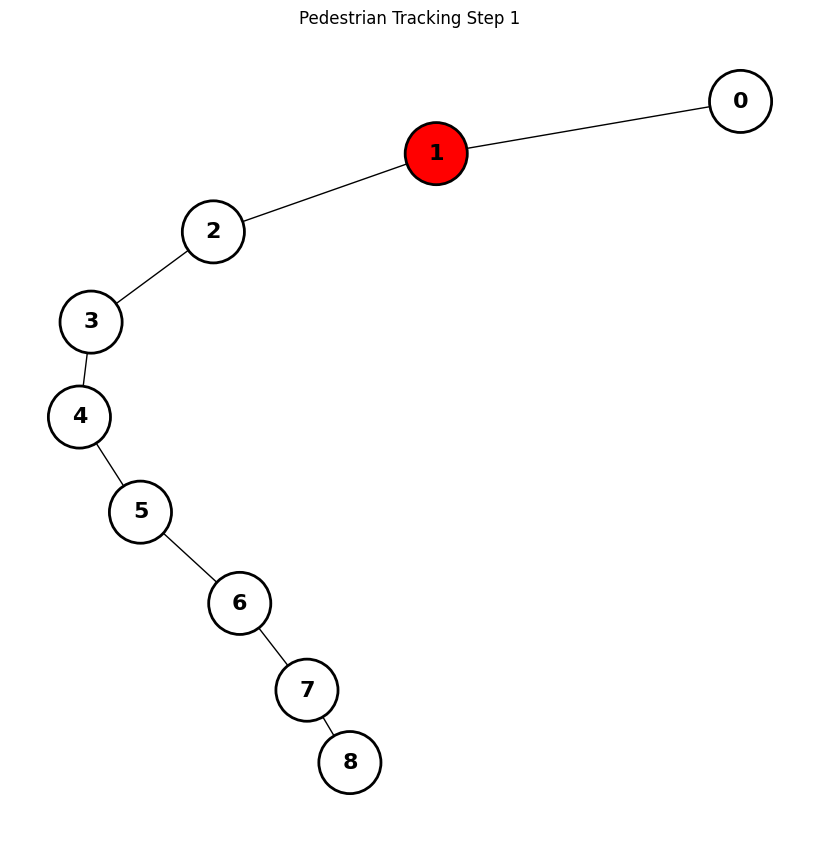

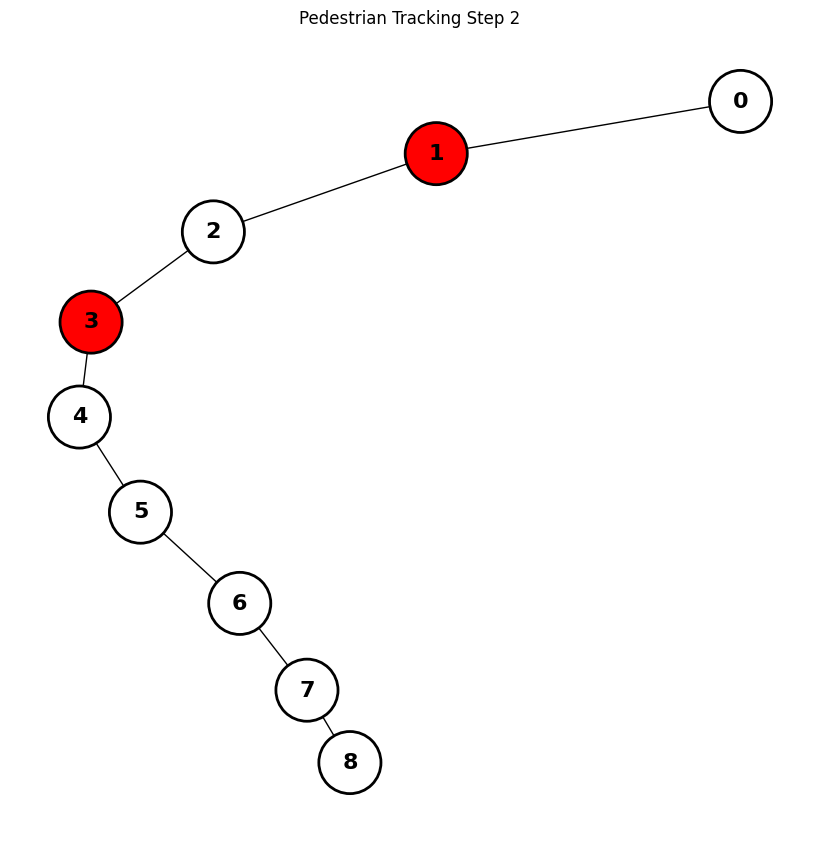

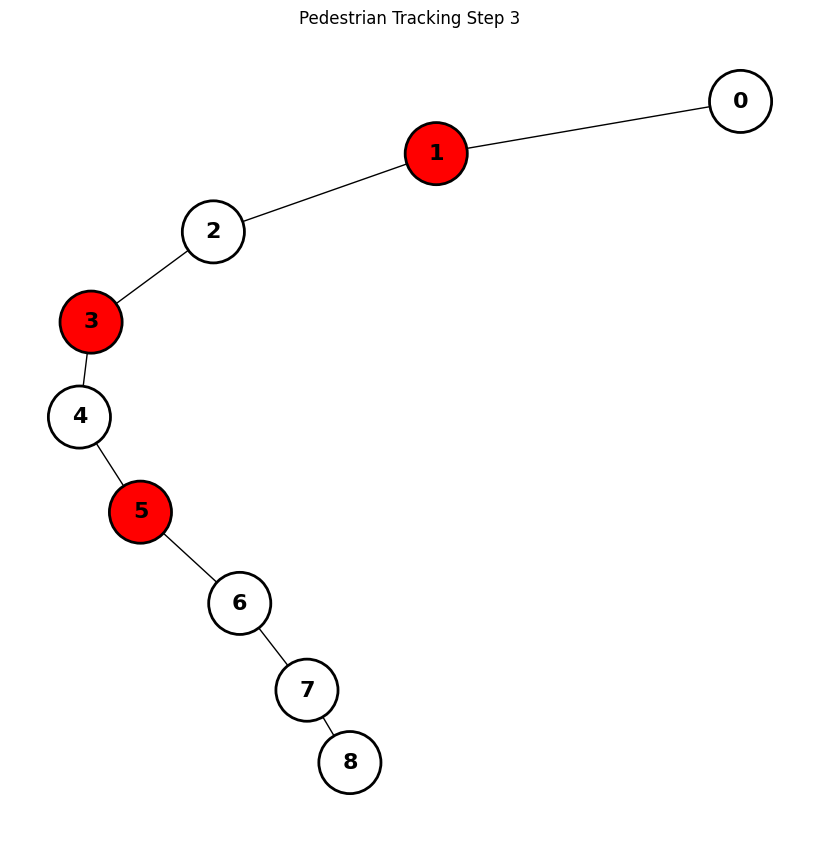

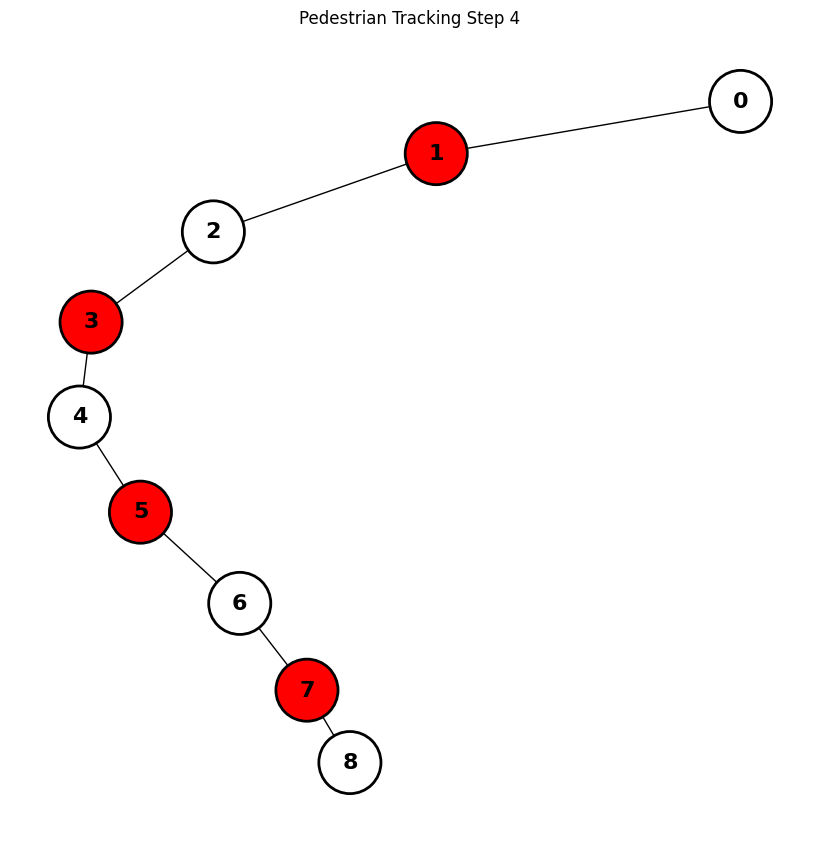

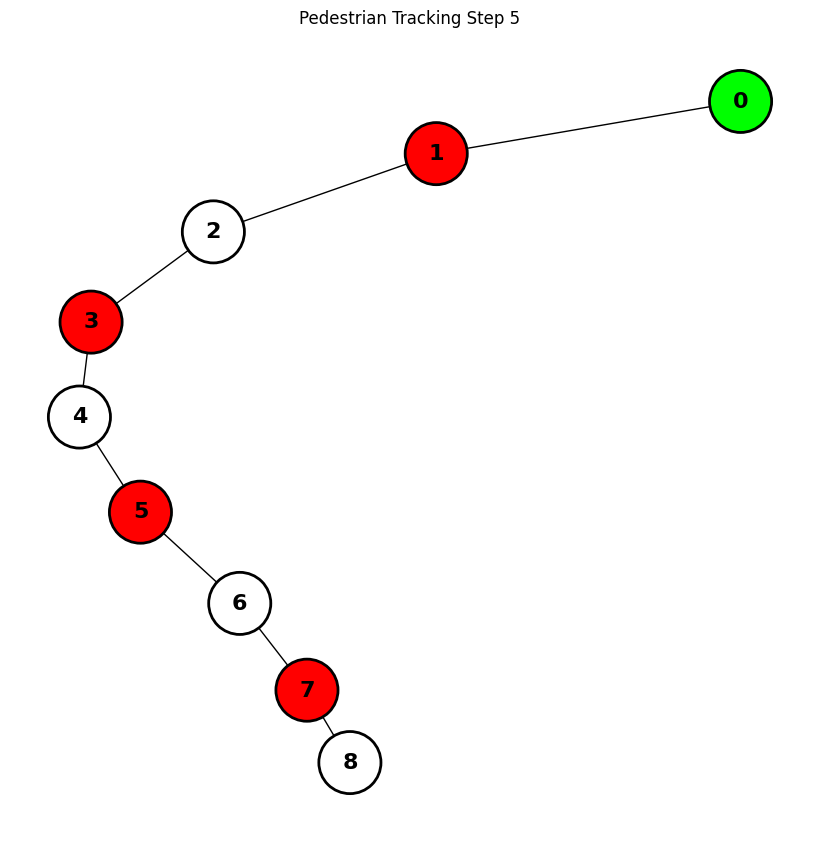

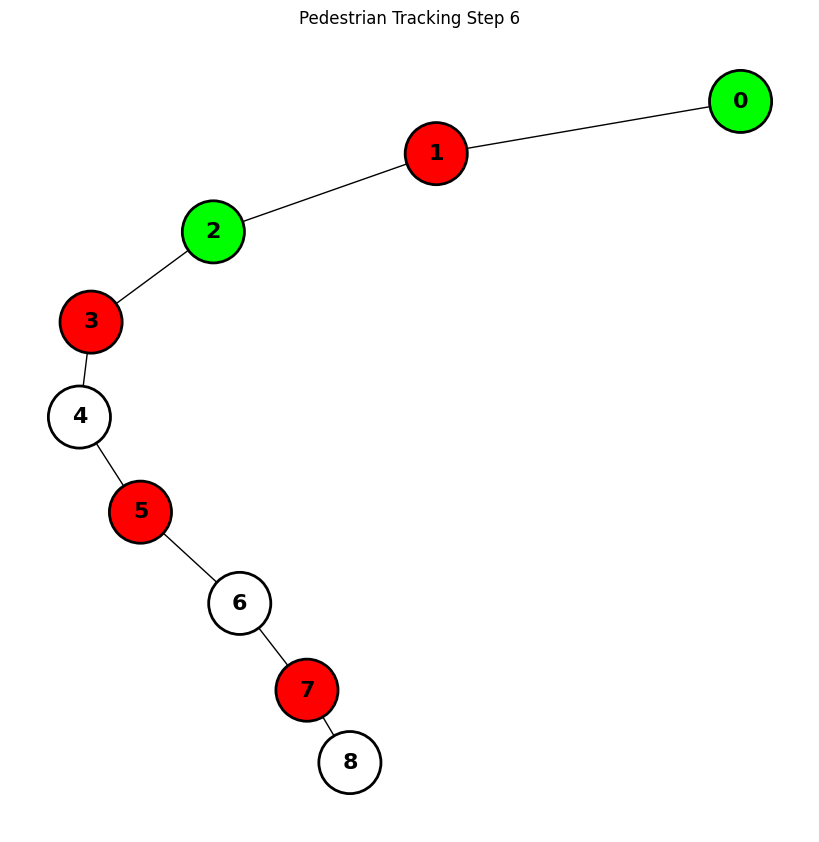

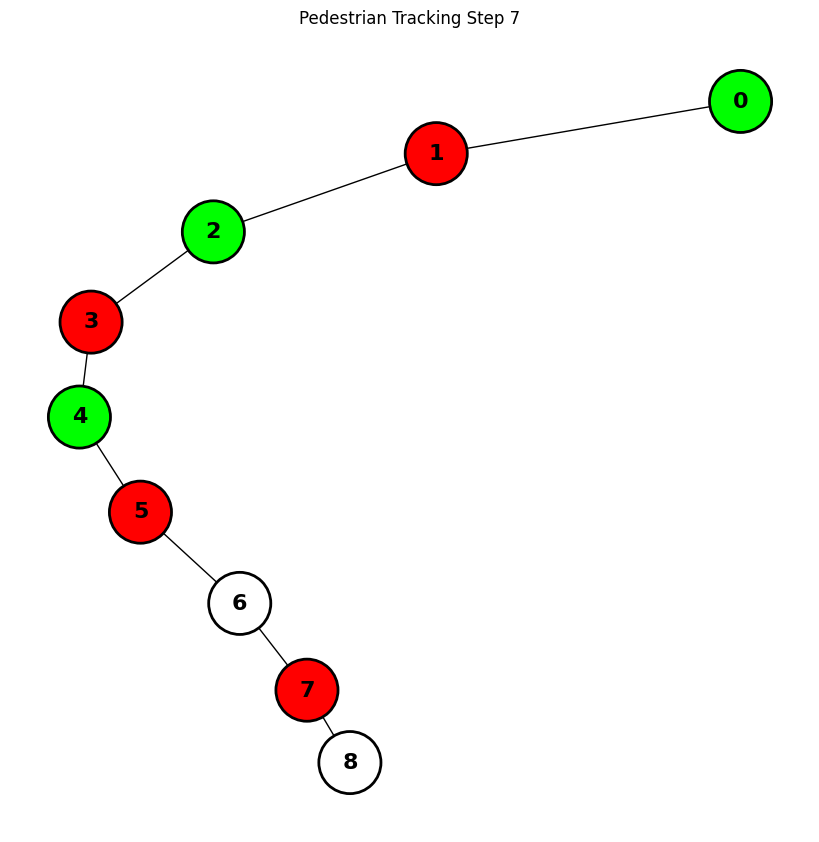

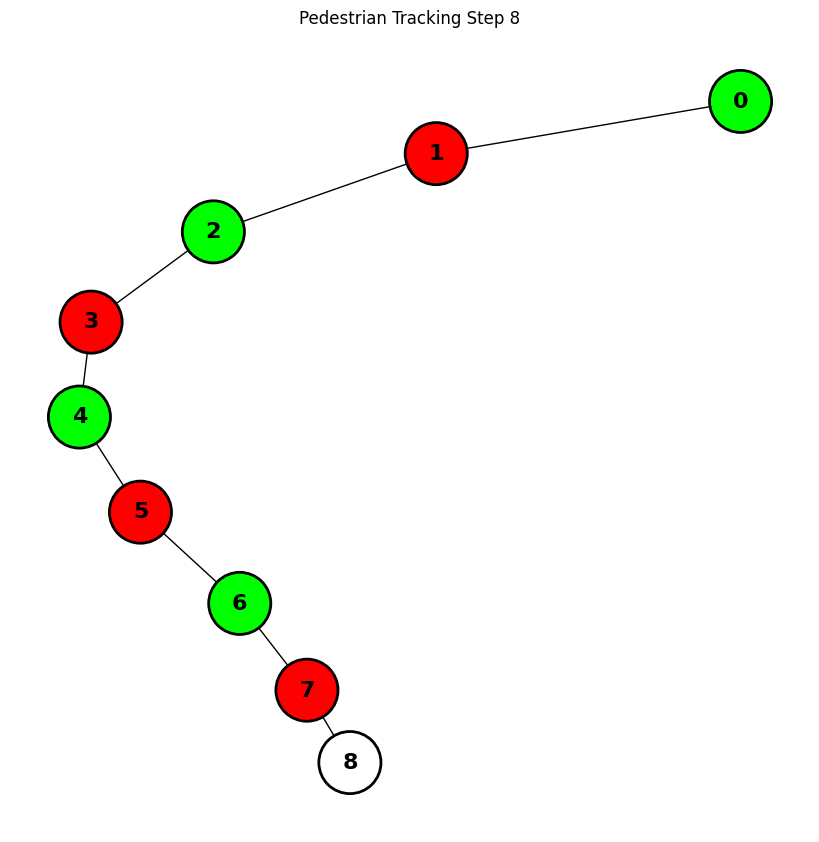

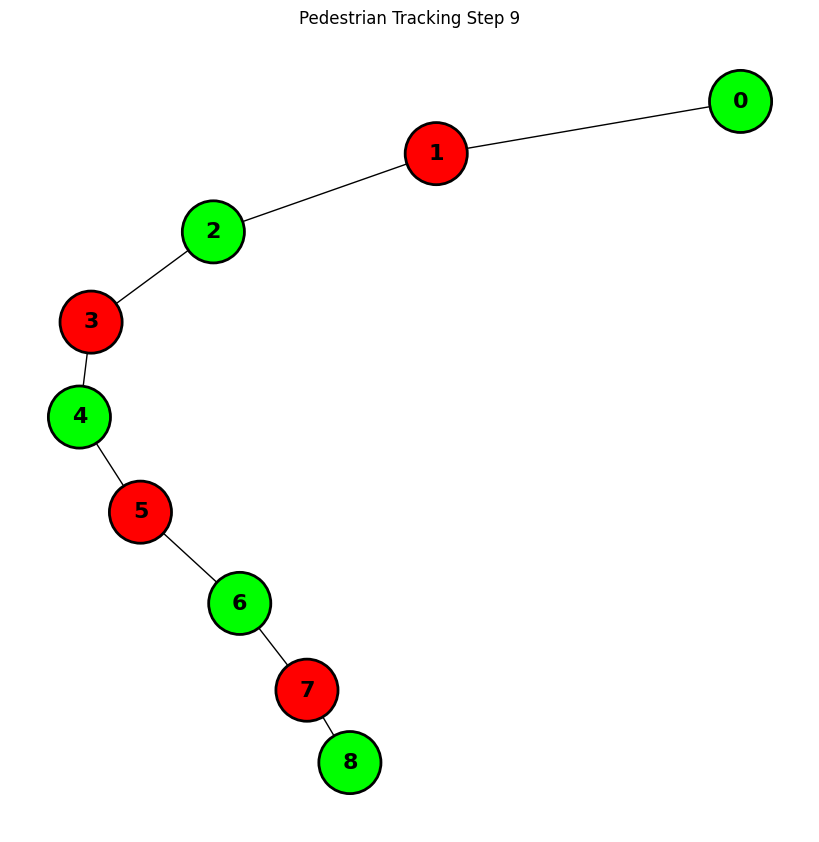

Final Pedestrian Position Assignment: {1: 'Position 0', 3: 'Position 0', 5: 'Position 0', 7: 'Position 0', 0: 'Position 1', 2: 'Position 1', 4: 'Position 1', 6: 'Position 1', 8: 'Position 1'}


In [4]:
# !pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define the graph for pedestrian positions (nodes) and movement (edges)
G = nx.Graph()
edges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8)]
G.add_edges_from(edges)

# Step 2: Define the available pedestrian positions
positions = ['Position 0', 'Position 1', 'Position 2', 'Position 3', 'Position 4',
             'Position 5', 'Position 6', 'Position 7', 'Position 8']

# Step 3: Visualize the pedestrian tracking step by step
def visualize_graph(assignment, step):
    plt.figure(figsize=(8, 8))  # Increase the figure size for better clarity
    pos = nx.spring_layout(G, seed=42)  # Use spring layout for better node spacing

    # Default color for uncolored nodes is white
    node_colors = ['#ffffff'] * len(G.nodes)
    # Assign colors to the nodes based on the current assignment (simulating positions)
    for node, assigned_position in assignment.items():
        if assigned_position == 'Position 0':
            node_colors[node] = '#FF0000'  # Red for Position 0
        elif assigned_position == 'Position 1':
            node_colors[node] = '#00FF00'  # Green for Position 1
        elif assigned_position == 'Position 2':
            node_colors[node] = '#0000FF'  # Blue for Position 2
        elif assigned_position == 'Position 3':
            node_colors[node] = '#FFFF00'  # Yellow for Position 3
        elif assigned_position == 'Position 4':
            node_colors[node] = '#FF00FF'  # Magenta for Position 4
        elif assigned_position == 'Position 5':
            node_colors[node] = '#00FFFF'  # Cyan for Position 5
        elif assigned_position == 'Position 6':
            node_colors[node] = '#FFA500'  # Orange for Position 6
        elif assigned_position == 'Position 7':
            node_colors[node] = '#800080'  # Purple for Position 7
        elif assigned_position == 'Position 8':
            node_colors[node] = '#808080'  # Gray for Position 8

    # Draw the graph with current pedestrian position assignments
    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold',
            node_size=2000, font_size=16, font_color='black', edge_color='black',
            linewidths=2, node_shape='o', edgecolors='black')

    plt.title(f"Pedestrian Tracking Step {step}")
    plt.show()

# Step 4: Function to check if a pedestrian's position assignment is valid
def is_valid_position(node, position, assignment):
    # Ensure no neighboring node (previous or next time step) has the same position
    for neighbor in G.neighbors(node):
        if neighbor in assignment and assignment[neighbor] == position:
            return False  # Conflict found
    return True  # No conflict

# Step 5: Minimum Remaining Values (MRV) Heuristic
def select_unassigned_node_MRV(assignment):
    unassigned_nodes = [node for node in G.nodes if node not in assignment]
    mrv_node = None
    min_remaining_values = float('inf')

    for node in unassigned_nodes:
        remaining_values = sum(is_valid_position(node, position, assignment) for position in positions)
        if remaining_values < min_remaining_values:
            min_remaining_values = remaining_values
            mrv_node = node

    return mrv_node

# Step 6: Degree Heuristic
def select_unassigned_node_Degree(assignment):
    unassigned_nodes = [node for node in G.nodes if node not in assignment]
    degree_node = max(unassigned_nodes, key=lambda node: len([n for n in G.neighbors(node) if n not in assignment]))
    return degree_node

# Step 7: Backtracking with MRV and Degree Heuristic
def backtracking_with_heuristics(assignment, heuristic, step):
    if len(assignment) == len(G.nodes):
        return assignment  # All nodes (positions) are assigned

    # Choose the next node to assign a position using the chosen heuristic
    if heuristic == 'MRV':
        node = select_unassigned_node_MRV(assignment)
    elif heuristic == 'Degree':
        node = select_unassigned_node_Degree(assignment)
    else:
        node = list(G.nodes)[len(assignment)]  # Fallback, default to a sequential assignment

    for position in positions:
        if is_valid_position(node, position, assignment):
            assignment[node] = position  # Assign the position
            visualize_graph(assignment, step)  # Visualize the current step
            result = backtracking_with_heuristics(assignment, heuristic, step+1)
            if result:
                return result  # Return if a valid tracking is found
            del assignment[node]  # Backtrack if no valid solution is found

    return None  # No solution found, backtrack

# Step 8: Function to let user choose between MRV and Degree Heuristic
def track_pedestrian_with_backtracking():
    print("Choose a heuristic:")
    print("1. Minimum Remaining Values (MRV)")
    print("2. Degree Heuristic")
    choice = input("Enter 1 or 2: ")

    if choice == '1':
        heuristic = 'MRV'
    elif choice == '2':
        heuristic = 'Degree'
    else:
        print("Invalid choice. Defaulting to sequential assignment.")
        heuristic = None

    final_assignment = backtracking_with_heuristics({}, heuristic, 1)
    print("Final Pedestrian Position Assignment:", final_assignment)

# Step 9: Run the pedestrian tracking with backtracking and heuristic of choice
track_pedestrian_with_backtracking()


Choose a heuristic:
1. Minimum Remaining Values (MRV)
2. Degree Heuristic
Enter 1 or 2: 2


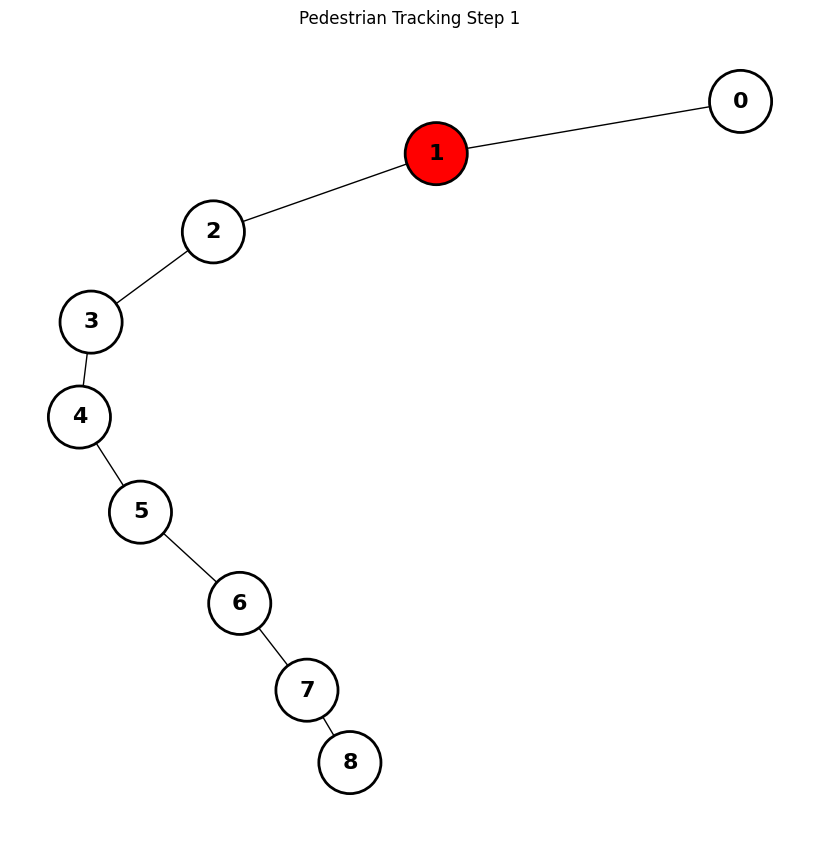

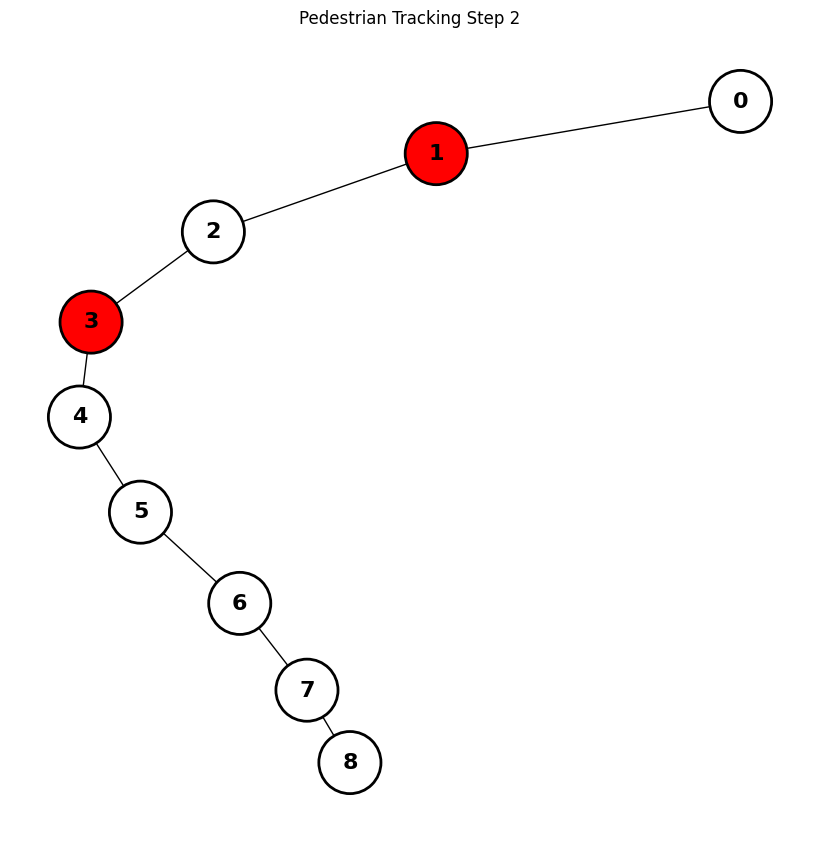

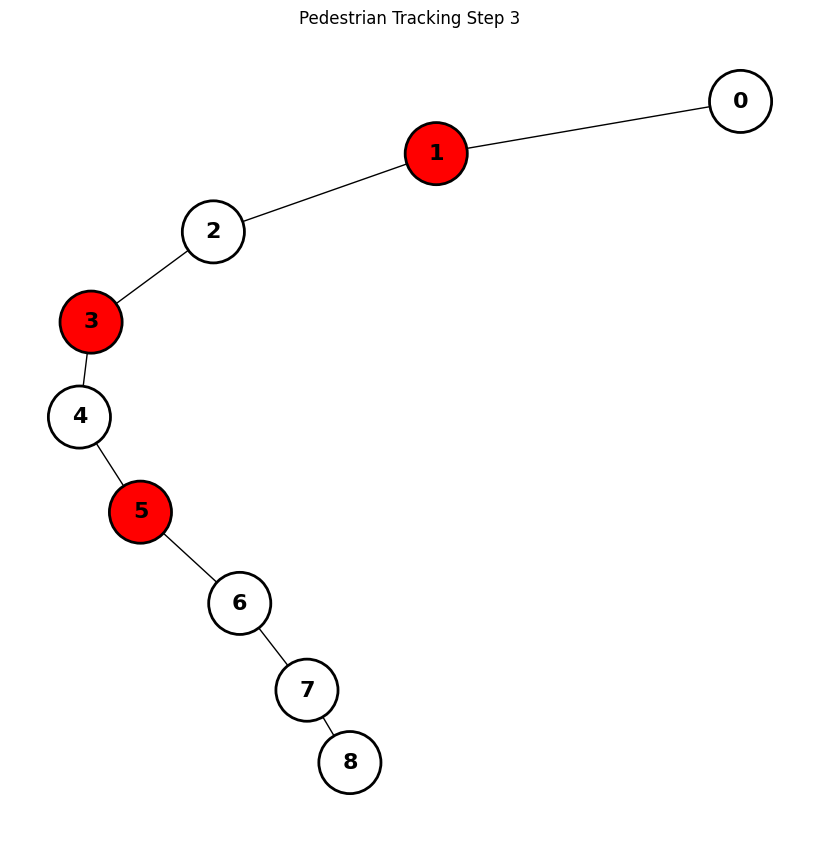

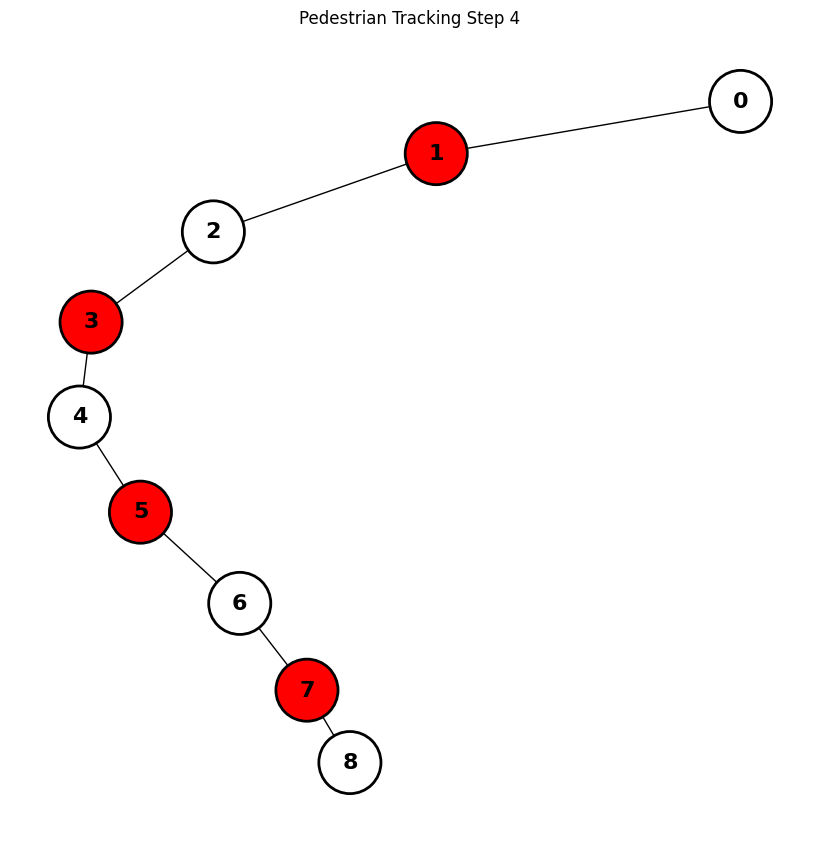

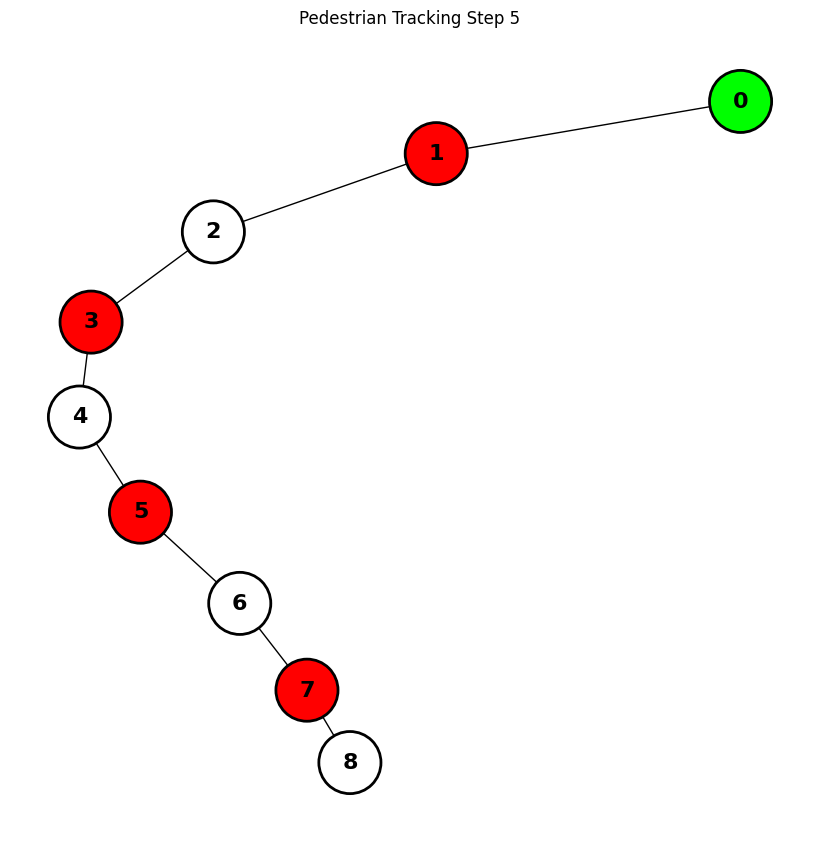

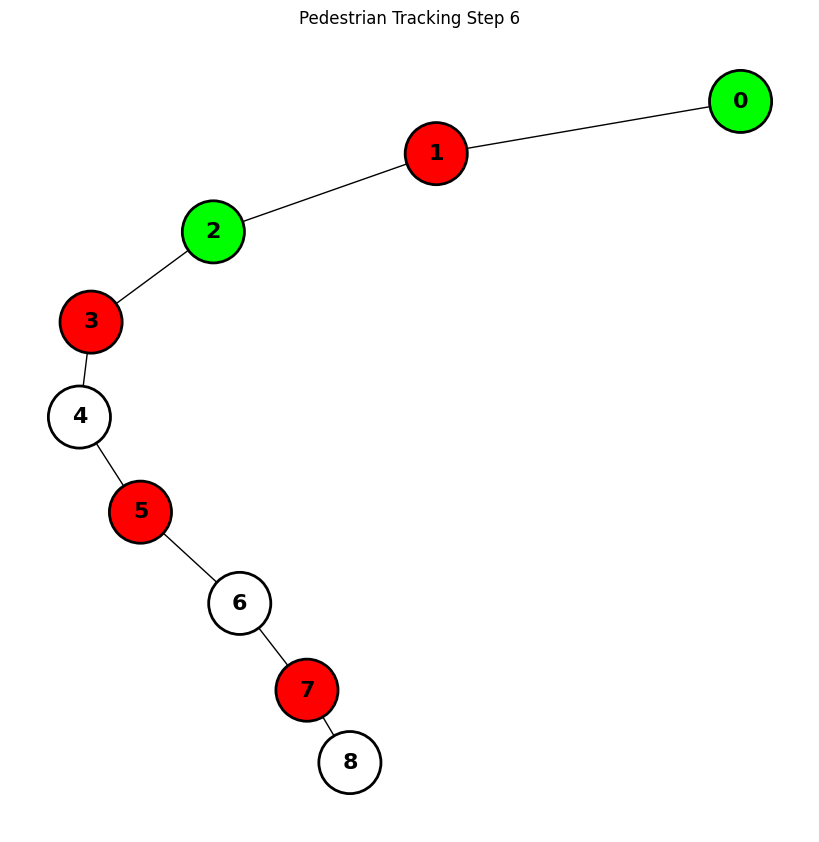

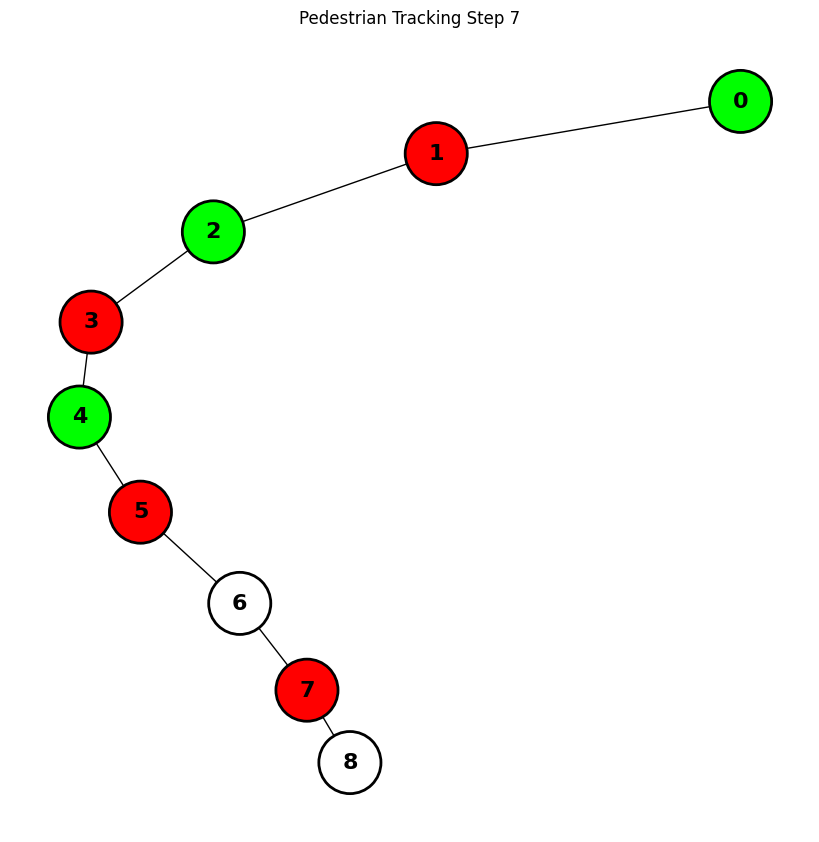

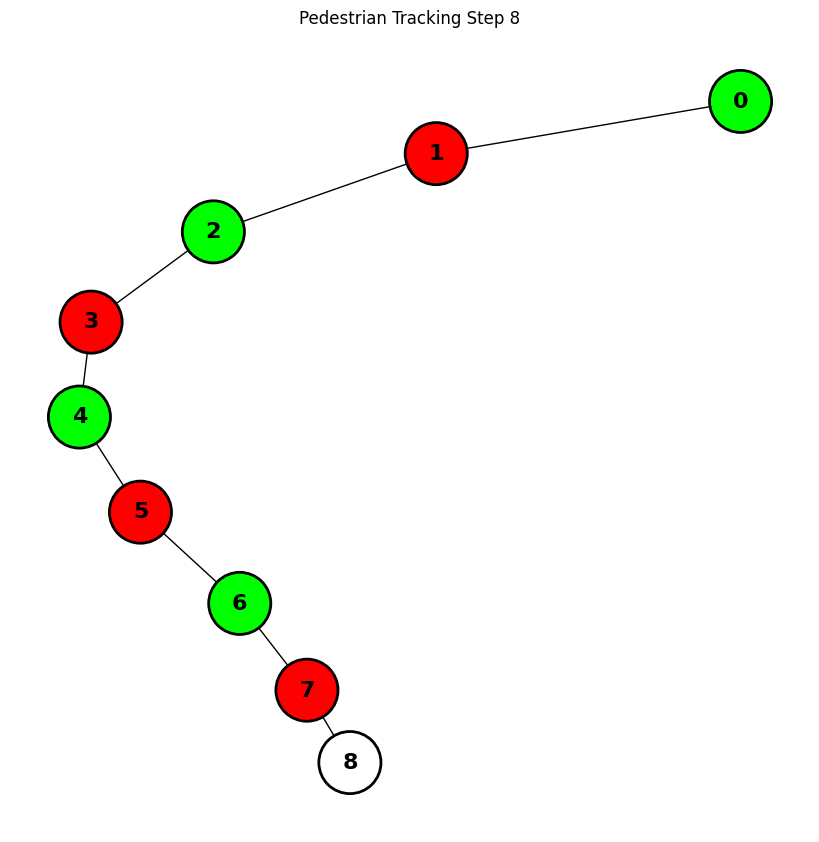

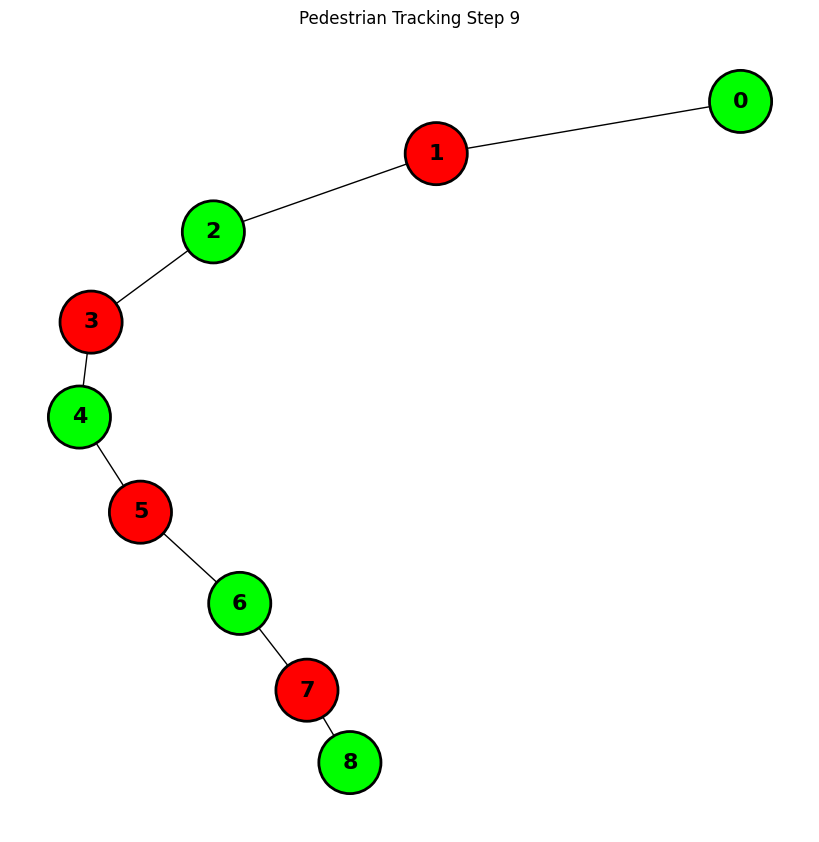

Final Pedestrian Position Assignment: {1: 'Position 0', 3: 'Position 0', 5: 'Position 0', 7: 'Position 0', 0: 'Position 1', 2: 'Position 1', 4: 'Position 1', 6: 'Position 1', 8: 'Position 1'}


In [5]:
# !pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define the graph representing pedestrian movements between positions
G = nx.Graph()
edges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8)]  # Simulating possible movements
G.add_edges_from(edges)

# Step 2: Define the available positions (for the autonomous vehicle pedestrian tracking task)
positions = ['Position 0', 'Position 1', 'Position 2', 'Position 3', 'Position 4',
             'Position 5', 'Position 6', 'Position 7', 'Position 8']

# Step 3: Visualize the pedestrian position assignments step by step
def visualize_graph(assignment, step):
    plt.figure(figsize=(8, 8))  # Increase the figure size for better clarity
    pos = nx.spring_layout(G, seed=42)  # Use spring layout for better node spacing

    # Default color for uncolored nodes is white
    node_colors = ['#ffffff'] * len(G.nodes)
    # Assign colors to the nodes based on the current assignment
    for node, assigned_position in assignment.items():
        if assigned_position == 'Position 0':
            node_colors[node] = '#FF0000'
        elif assigned_position == 'Position 1':
            node_colors[node] = '#00FF00'
        elif assigned_position == 'Position 2':
            node_colors[node] = '#0000FF'
        elif assigned_position == 'Position 3':
            node_colors[node] = '#FFFF00'
        elif assigned_position == 'Position 4':
            node_colors[node] = '#FF00FF'
        elif assigned_position == 'Position 5':
            node_colors[node] = '#00FFFF'
        elif assigned_position == 'Position 6':
            node_colors[node] = '#FFA500'
        elif assigned_position == 'Position 7':
            node_colors[node] = '#800080'
        elif assigned_position == 'Position 8':
            node_colors[node] = '#808080'

    # Draw the graph with current position assignments
    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold',
            node_size=2000, font_size=16, font_color='black', edge_color='black',
            linewidths=2, node_shape='o', edgecolors='black')

    plt.title(f"Pedestrian Tracking Step {step}")
    plt.show()

# Step 4: Function to check if a position assignment is valid
def is_valid_position(node, position, assignment):
    # Ensure no neighboring node (previous or next time step) has the same position
    for neighbor in G.neighbors(node):
        if neighbor in assignment and assignment[neighbor] == position:
            return False  # Conflict found
    return True  # No conflict

# Step 5: Minimum Remaining Values (MRV) Heuristic
def select_unassigned_node_MRV(assignment):
    unassigned_nodes = [node for node in G.nodes if node not in assignment]
    mrv_node = None
    min_remaining_values = float('inf')

    for node in unassigned_nodes:
        remaining_values = sum(is_valid_position(node, position, assignment) for position in positions)
        if remaining_values < min_remaining_values:
            min_remaining_values = remaining_values
            mrv_node = node

    return mrv_node

# Step 6: Degree Heuristic
def select_unassigned_node_Degree(assignment):
    unassigned_nodes = [node for node in G.nodes if node not in assignment]
    degree_node = max(unassigned_nodes, key=lambda node: len([n for n in G.neighbors(node) if n not in assignment]))
    return degree_node

# Step 7: Backtracking with MRV and Degree Heuristic
def backtracking_with_heuristics(assignment, heuristic, step):
    if len(assignment) == len(G.nodes):
        return assignment  # All nodes (positions) are assigned

    # Choose the next node to assign a position using the chosen heuristic
    if heuristic == 'MRV':
        node = select_unassigned_node_MRV(assignment)
    elif heuristic == 'Degree':
        node = select_unassigned_node_Degree(assignment)
    else:
        node = list(G.nodes)[len(assignment)]  # Fallback, default to a sequential assignment

    for position in positions:
        if is_valid_position(node, position, assignment):
            assignment[node] = position  # Assign the position
            visualize_graph(assignment, step)  # Visualize the current step
            result = backtracking_with_heuristics(assignment, heuristic, step+1)
            if result:
                return result  # Return if a valid tracking is found
            del assignment[node]  # Backtrack if no valid solution is found

    return None  # No solution found, backtrack

# Step 8: Function to let user choose between MRV and Degree Heuristic
def track_pedestrian_with_backtracking():
    print("Choose a heuristic:")
    print("1. Minimum Remaining Values (MRV)")
    print("2. Degree Heuristic")
    choice = input("Enter 1 or 2: ")

    if choice == '1':
        heuristic = 'MRV'
    elif choice == '2':
        heuristic = 'Degree'
    else:
        print("Invalid choice. Defaulting to sequential assignment.")
        heuristic = None

    final_assignment = backtracking_with_heuristics({}, heuristic, 1)
    print("Final Pedestrian Position Assignment:", final_assignment)

# Step 9: Run the pedestrian tracking with backtracking and heuristic of choice
track_pedestrian_with_backtracking()


# **Final Graph Coloring Code**

Enter the number of nodes: 6
Choose a heuristic:
1. Minimum Remaining Values (MRV)
2. Degree Heuristic
Enter 1 or 2: 1


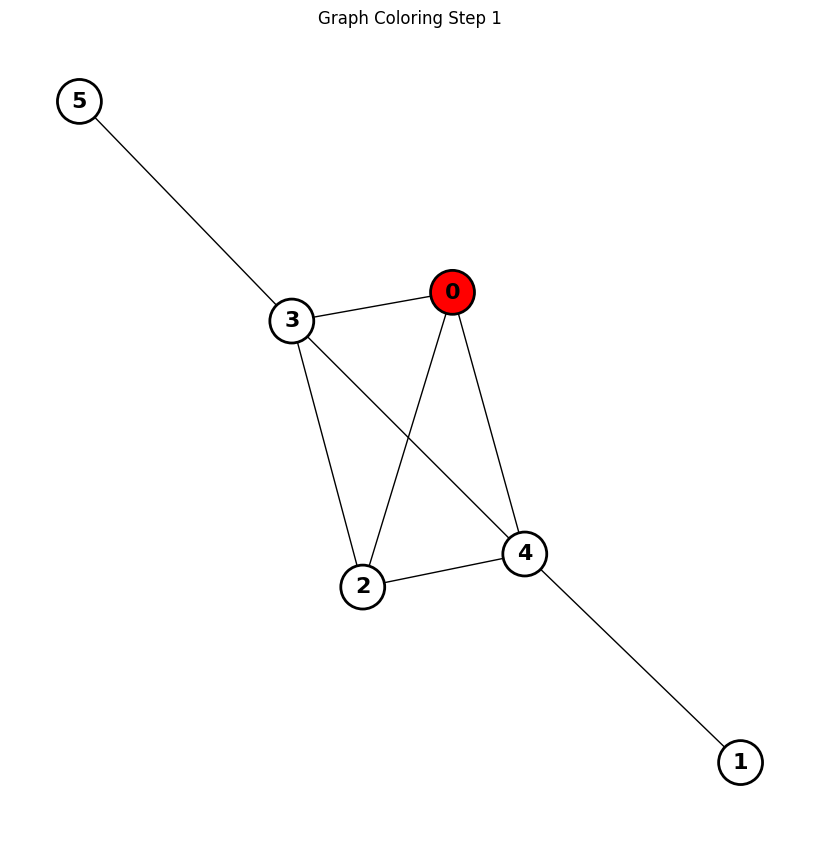

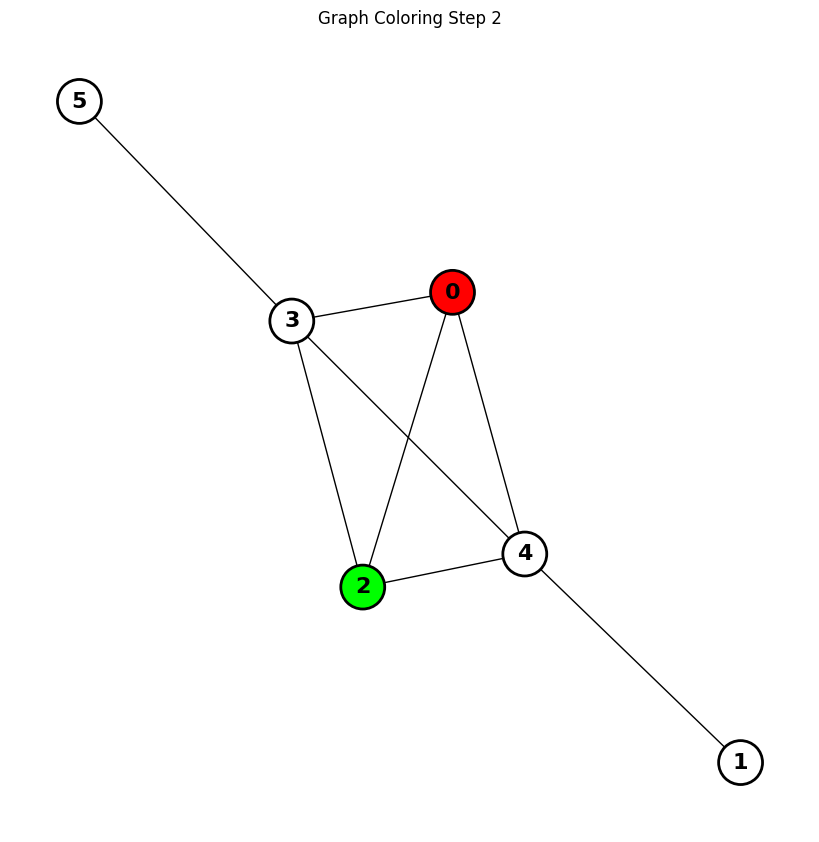

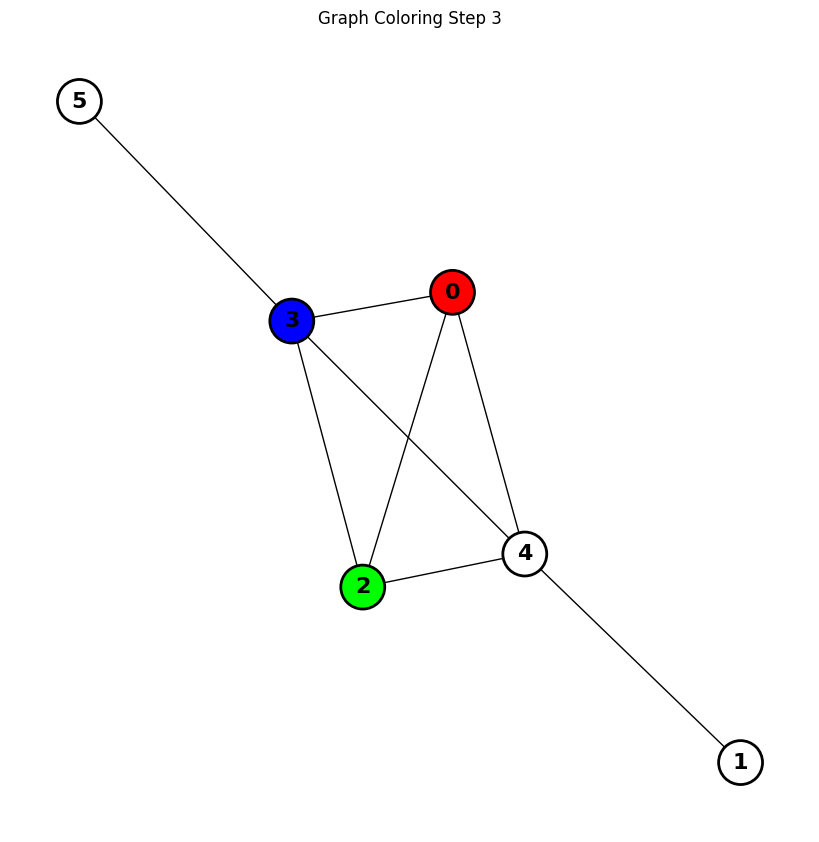

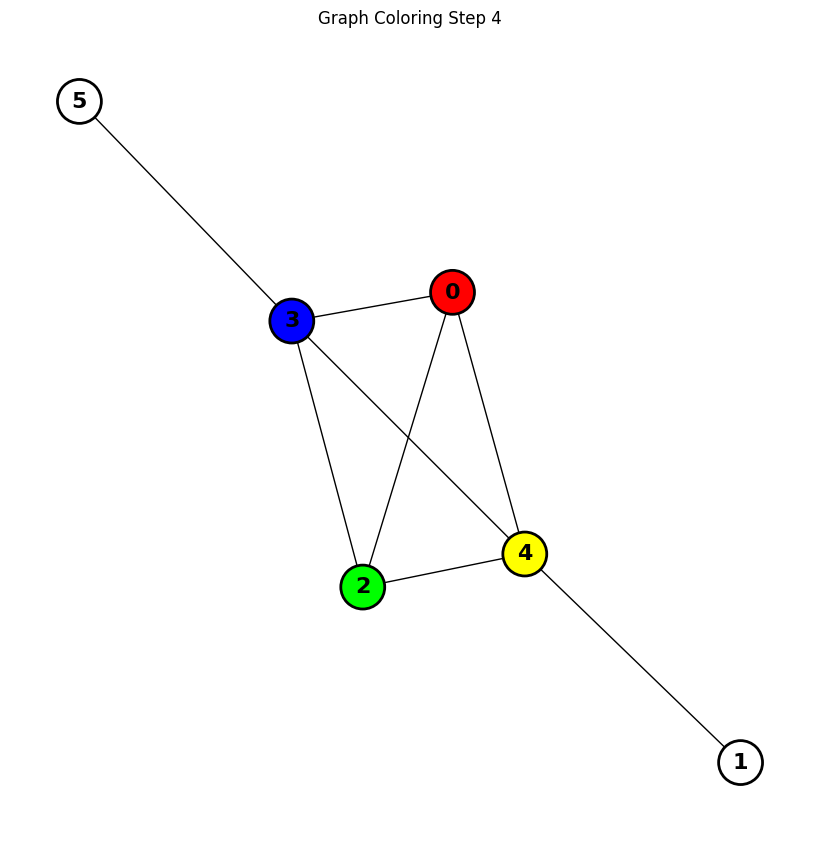

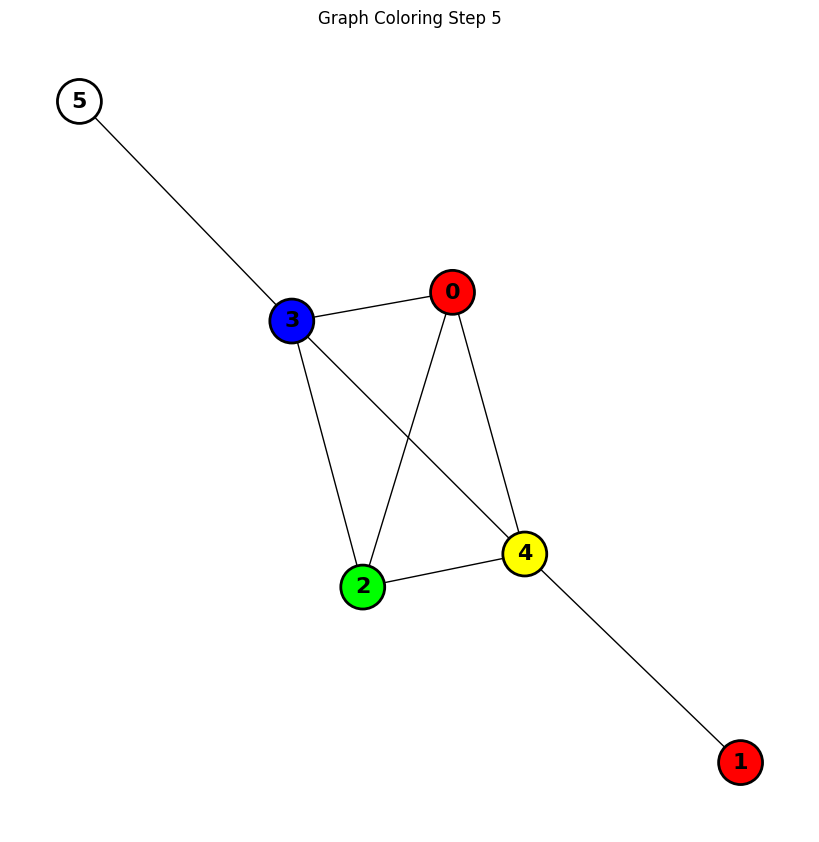

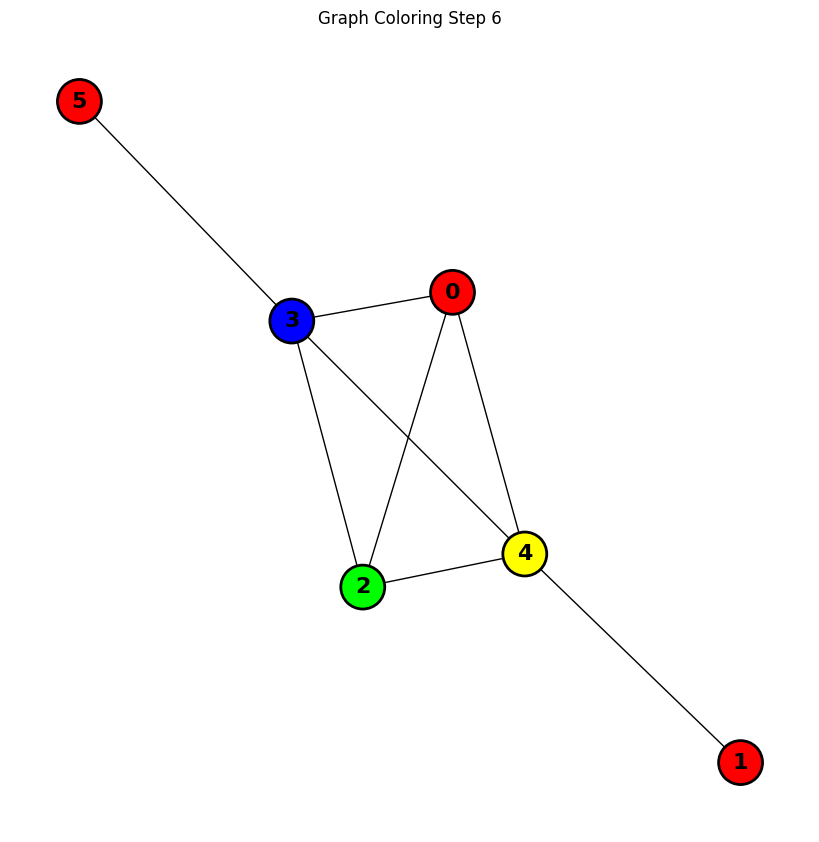

Final Assignment: {0: '#FF0000', 2: '#00FF00', 3: '#0000FF', 4: '#FFFF00', 1: '#FF0000', 5: '#FF0000'}


In [6]:
# Install necessary libraries (if needed)
# !pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Automatically generate a set of colors based on the number of nodes
def generate_colors(num_nodes):
    color_list = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#800080', '#FFA500', '#00FF7F']
    return color_list[:min(num_nodes, len(color_list))]

# Step 2: Function to create a random graph with the specified number of nodes
def create_random_graph(num_nodes):
    G = nx.gnp_random_graph(num_nodes, 0.4, seed=42)  # Random graph generation
    return G

# Step 3: Visualize the graph coloring step by step
def visualize_graph(G, assignment, step, pos):
    plt.figure(figsize=(8, 8))  # Increase the figure size for better clarity

    # Default color for uncolored nodes is white
    node_colors = ['#ffffff'] * len(G.nodes)
    # Assign colors to the nodes based on the current assignment
    for node, color in assignment.items():
        node_colors[node] = color

    # Draw the graph with current color assignments
    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold',
            node_size=1000, font_size=16, font_color='black', edge_color='black',
            linewidths=2, node_shape='o', edgecolors='black')

    plt.title(f"Graph Coloring Step {step}")
    plt.show()

# Step 4: Function to check if a color assignment is valid
def is_valid_color(G, node, color, assignment):
    # Check all neighboring nodes to ensure no conflict (no neighbor has the same color)
    for neighbor in G.neighbors(node):
        if neighbor in assignment and assignment[neighbor] == color:
            return False  # Conflict found
    return True  # No conflict

# Step 5: Minimum Remaining Values (MRV) Heuristic
def select_unassigned_node_MRV(G, assignment, colors):
    unassigned_nodes = [node for node in G.nodes if node not in assignment]
    # For each unassigned node, count the number of legal values
    mrv_node = None
    min_remaining_values = float('inf')

    for node in unassigned_nodes:
        remaining_values = sum(is_valid_color(G, node, color, assignment) for color in colors)
        if remaining_values < min_remaining_values:
            min_remaining_values = remaining_values
            mrv_node = node

    return mrv_node

# Step 6: Degree Heuristic
def select_unassigned_node_Degree(G, assignment):
    unassigned_nodes = [node for node in G.nodes if node not in assignment]
    # Select the node with the highest number of uncolored neighbors (degree)
    degree_node = max(unassigned_nodes, key=lambda node: len([n for n in G.neighbors(node) if n not in assignment]))
    return degree_node

# Step 7: Backtracking with Heuristics
def backtracking_with_heuristics(G, assignment, heuristic, step, colors, pos):
    if len(assignment) == len(G.nodes):
        return assignment  # All nodes are colored

    # Choose the next node to assign a color using the chosen heuristic
    if heuristic == 'MRV':
        node = select_unassigned_node_MRV(G, assignment, colors)
    elif heuristic == 'Degree':
        node = select_unassigned_node_Degree(G, assignment)
    else:
        node = list(G.nodes)[len(assignment)]  # Fallback, default to a sequential assignment

    for color in colors:
        if is_valid_color(G, node, color, assignment):
            assignment[node] = color  # Assign the color
            visualize_graph(G, assignment, step, pos)  # Visualize the current step
            result = backtracking_with_heuristics(G, assignment, heuristic, step+1, colors, pos)
            if result:
                return result  # Return if a valid coloring is found
            del assignment[node]  # Backtrack if no valid solution is found

    return None  # No solution found, backtrack

# Step 8: Function to let user choose number of nodes, backtracking heuristic, and random graph
def color_graph_with_user_input():
    # Ask the user for the number of nodes
    num_nodes = int(input("Enter the number of nodes: "))

    # Generate colors based on the number of nodes
    colors = generate_colors(num_nodes)

    # Create a random graph
    G = create_random_graph(num_nodes)

    # Choose a heuristic
    print("Choose a heuristic:")
    print("1. Minimum Remaining Values (MRV)")
    print("2. Degree Heuristic")
    choice = input("Enter 1 or 2: ")

    if choice == '1':
        heuristic = 'MRV'
    elif choice == '2':
        heuristic = 'Degree'
    else:
        print("Invalid choice. Defaulting to sequential assignment.")
        heuristic = None

    pos = nx.spring_layout(G, seed=42)  # Generate the position for the graph layout

    # Perform backtracking with the chosen heuristic
    final_assignment = backtracking_with_heuristics(G, {}, heuristic, 1, colors, pos)
    print("Final Assignment:", final_assignment)

# Step 9: Run the graph coloring with user input
color_graph_with_user_input()
